In [336]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker #Convert to Millions

#Converter
def millions_converter(x, pos):
    return f'{x / 1000000:.0f}M'

### Load data

In [195]:
df= pd.read_csv('hotel_booking_csv.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


### Data Cleaning

In [196]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [197]:
#Drop unnecessary column
df=df.drop(columns=['name','email','phone-number', 'credit_card'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [198]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [199]:
#Rows and Columns
df.shape

(119390, 32)

In [200]:
#Check Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [201]:
# Convert to Datetime
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [202]:
#Recheck Columns Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

### Summary-- Categorical Column

In [203]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [204]:
# See Unique data in each Column

for i in df.describe(include='object').columns:
    print(i) #Col
    print(df[i].unique())  #Col data Unique

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [205]:
#Check Null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [206]:
#Drop 2 Extra Column
#df.drop(columns=['agent', 'company'], axis=1, inplace=True)
#Drop 488 rows with NAN values
#df.dropna(inplace=True)

In [207]:
#Total Null Value in Whole df
df.isnull().sum().sum()

129425

### Summary-- Numerical Columns

In [208]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [209]:
#Remove adr Outlier for columns required for our analysis
df= df[df['adr']<5000]

In [210]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,103049.000000,6797.000000,119389.000000,119389.000000,119389.000000,119389.000000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.103891,0.007949,0.031912,0.087119,0.137098,0.221118,86.694107,189.266735,2.321169,101.786744,0.062518,0.571368
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.398563,0.097437,0.175768,0.844340,1.497443,0.652304,110.774841,131.655015,17.594793,48.153554,0.245292,0.792800
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.560000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


##  Data Analysis & Visualization

In [212]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Cancelled vs Not Cancelled %

In [224]:
# Cancelled %
is_cancelled= df['is_canceled'].value_counts(normalize=True)*100
is_cancelled

0    62.958899
1    37.041101
Name: is_canceled, dtype: float64

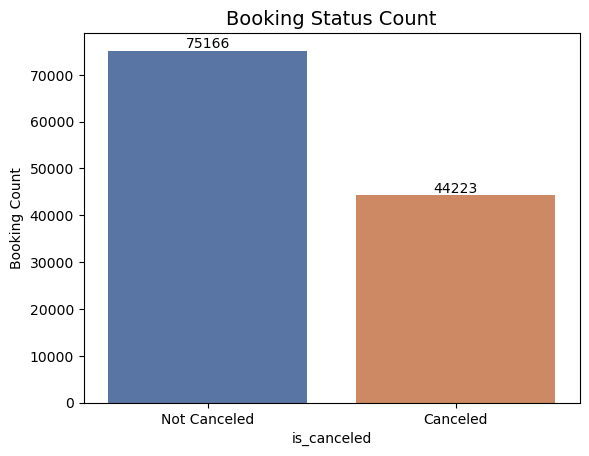

In [286]:
#Plot
x=sns.countplot(x='is_canceled',palette='deep',data=df)

for i in x.containers:
    x.bar_label(i)
    
x.set_xticklabels(['Not Canceled', 'Canceled'])
plt.title("Booking Status Count", fontsize=14)
plt.ylabel("Booking Count")
plt.show()


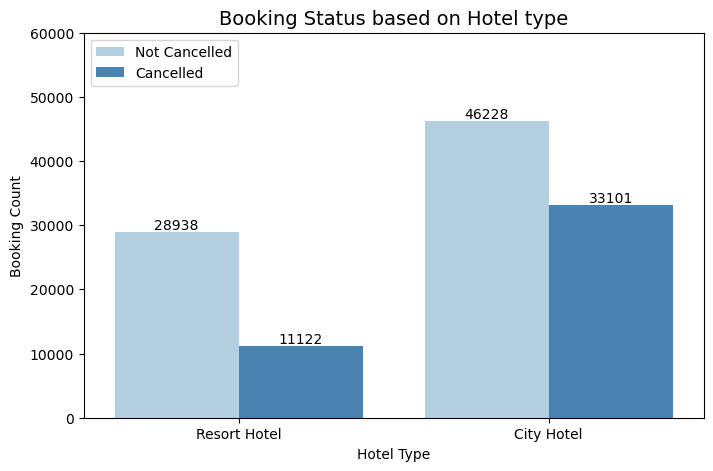

In [311]:
plt.figure(figsize=(8,5))
x= sns.countplot(x='hotel', hue='is_canceled',palette='Blues',data= df)

for i in x.containers:
    x.bar_label(i)

plt.title("Booking Status based on Hotel type", fontsize=14)
plt.xlabel("Hotel Type")
plt.ylim(0,60000)
plt.ylabel("Booking Count")
plt.legend(loc=2,labels=['Not Cancelled', 'Cancelled'])
plt.show()

### Filter data wrt Hotel type

In [415]:
#Cancellation percentage in Resort Hotel
RESORT_HOTEL= df[df['hotel']=='Resort Hotel'] 
is_cancelled=  RESORT_HOTEL['is_canceled'].value_counts(normalize=True)*100  
is_cancelled

0    72.236645
1    27.763355
Name: is_canceled, dtype: float64

In [416]:
#Cancellation percentage in City Hotel
CITY_HOTEL= df[df['hotel']=='City Hotel'] #All column for resort hotels
is_cancelled=  CITY_HOTEL['is_canceled'].value_counts(normalize=True)*100  
is_cancelled

0    58.273771
1    41.726229
Name: is_canceled, dtype: float64

### ADR by Hotel type

Ex: 10 people  paid 100 rupees each on 1/1/2020___   average amount is 100  for date 1/1/2020

In [438]:
resort_grp= RESORT_HOTEL.groupby('reservation_status_date', as_index=False)[['adr']].mean()
city_grp= CITY_HOTEL.groupby('reservation_status_date', as_index=False)[['adr']].mean()
resort_grp.head(3)

,reservation_status_date,adr
0,2014-11-18,0.000000
1,2015-01-01,61.966667
2,2015-01-02,9.633750


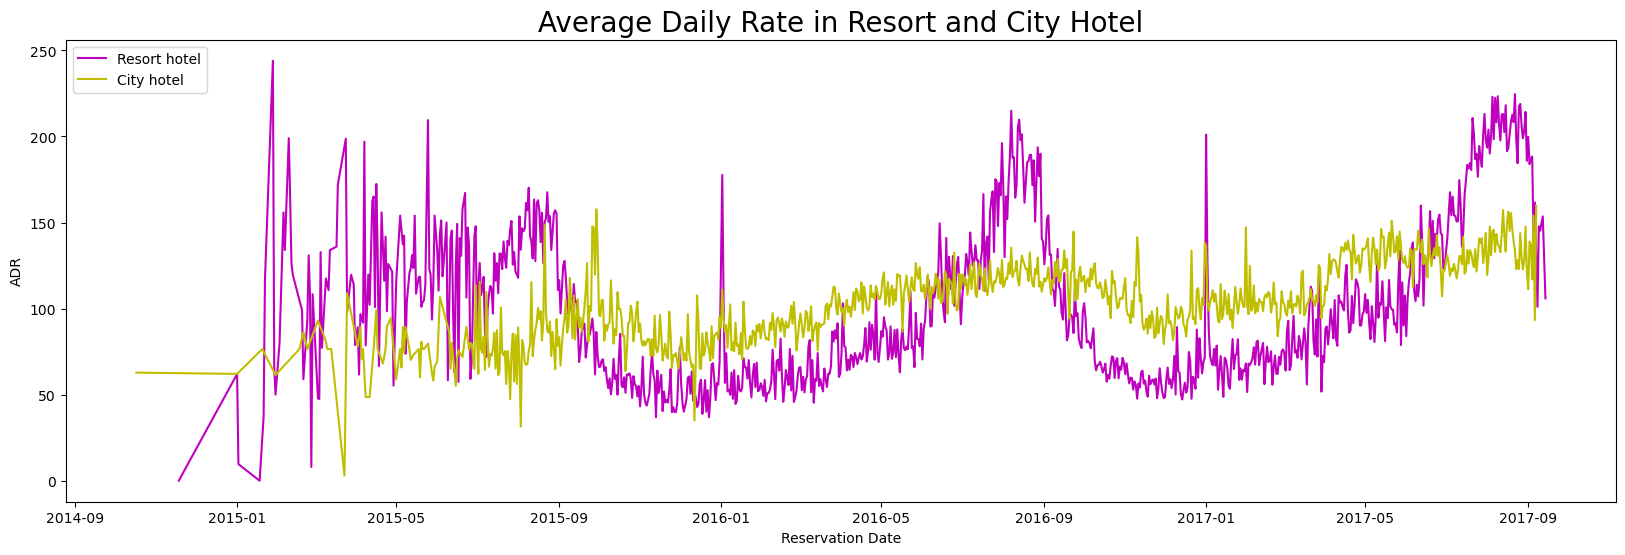

In [487]:
plt.figure(figsize=(20,6))
#Resort grp Plot
sns.lineplot(x='reservation_status_date', y='adr', color='m',label='Resort hotel', data=resort_hotel_grp)
#City grp plot
sns.lineplot(x='reservation_status_date', y='adr', color='y', label='City hotel', data=city_hotel_grp)

#Modification
plt.title("Average Daily Rate in Resort and City Hotel", fontsize=20)
plt.xlabel('Reservation Date')
plt.ylabel('ADR')
plt.legend(loc=2)

plt.show()

Note: 
-  City Hotel Prices are preety Constant comapred to resort hotel, It see spikes on Weekeends or Holidays
-  Resort Hotel Prices are even somtime going very and and sometime becoming very low even less than city hotels

### Create Month Column

In [440]:
df['month']=df['reservation_status_date'].dt.month

### Cancellation  based on Month

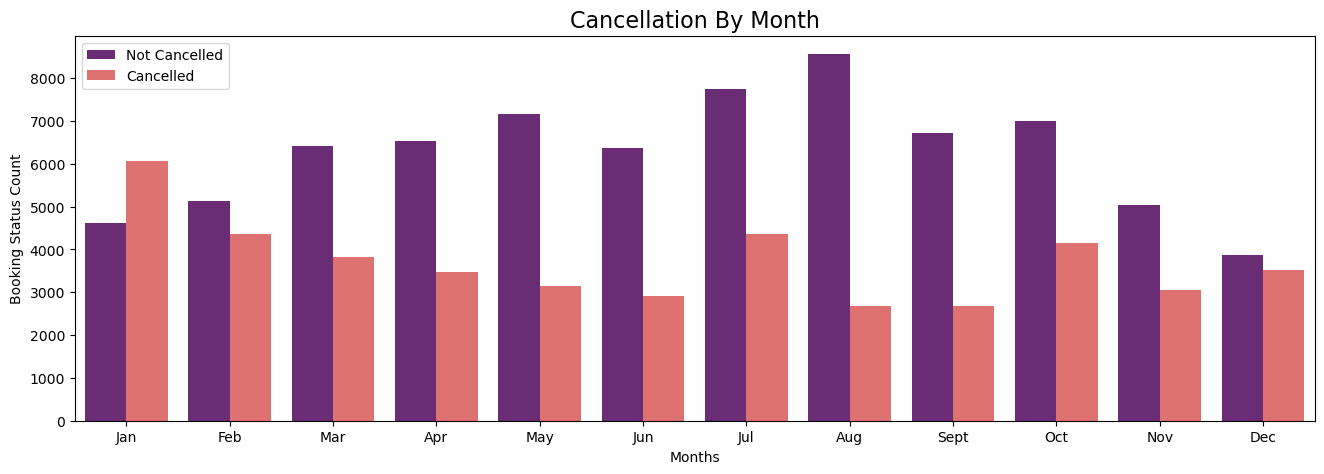

In [460]:
plt.figure(figsize=(16,5))
x=sns.countplot(x='month', hue='is_canceled',palette='magma' ,data= df)

plt.title("Cancellation By Month", fontsize=16)
plt.xlabel("Months")
plt.ylabel("Booking Status Count")
x.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sept','Oct', 'Nov', 'Dec'])
plt.legend(loc=2, labels=(['Not Cancelled', 'Cancelled']))
plt.show()

-  In January almost 65% People Cancelled the Booking
-  In August highest booking & very little Canacellation Happend.

### ADR based on Month

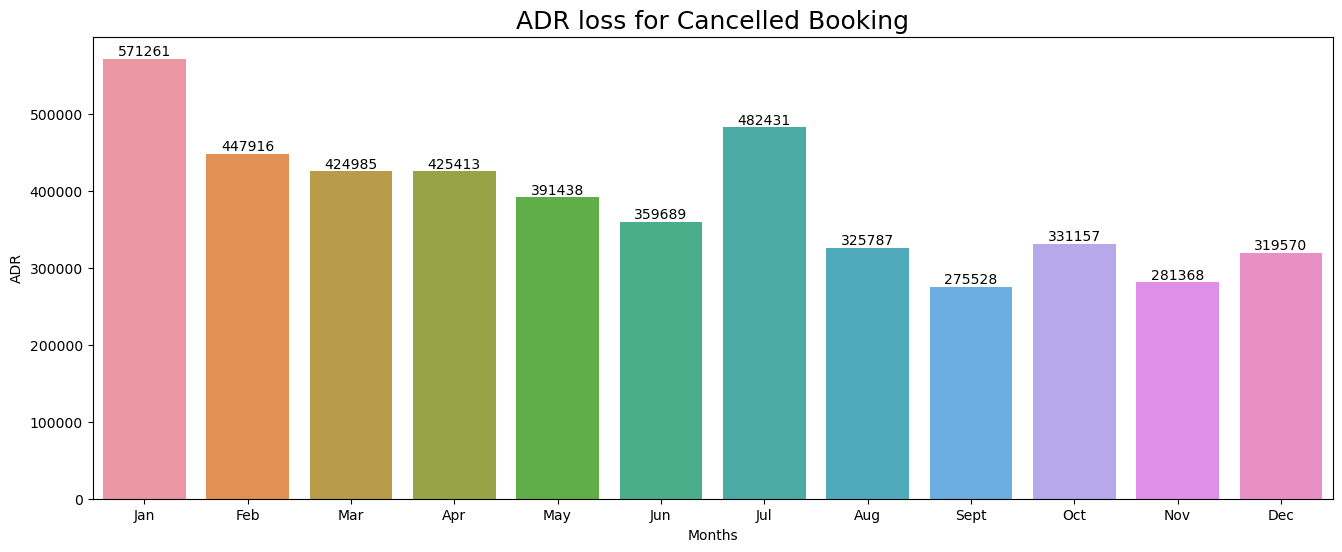

In [482]:
plt.figure(figsize=(16,6))
x=sns.barplot(x='month', y='adr', errorbar=None, data= df[df['is_canceled']==1].groupby('month', as_index=False)[['adr']].sum())
for i in x.containers:
    x.bar_label(i)

plt.title("ADR loss for Cancelled Booking", fontsize=18)
plt.xlabel("Months")
plt.ylabel("ADR")

x.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sept','Oct', 'Nov', 'Dec'])
plt.show()

Note: 
-  In January Amount(ADR) for Cancelled Booking is Very high, This Proves that January has the highest Cancellation
-  And August has the lowest Cancellation because the cancelled booking amount is very less.

### Cancellation%  Based on Country (Top 5)

In [512]:
# Filter Cancelled Booking from all data
cancelled_booking= df[df['is_canceled']==1]

# Filter Top10 countries
top10country= cancelled_booking['country'].value_counts()[0:5]
top10country.head()

PRT    27518
GBR     2453
ESP     2177
FRA     1934
ITA     1333
Name: country, dtype: int64

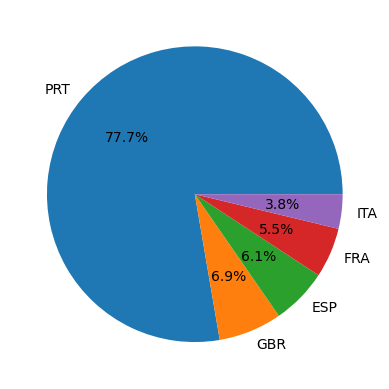

In [522]:
plt.pie(x= top10country, labels= top10country.index, autopct='%1.1f%%')
plt.show()

Note:
-  Portugal is facing 77.7 % Cancellation rate. It one country may show impact on overall business.
-  There might be chance other hotels are doing failry good, But It outlier hotel impact the overall number

Suggestion:
-  Increase Facility within same price
-  Reduce Cost
-  Do Maketing , Make awareness about your hotel

### Customer % by Channel type

In [574]:
platform= df['market_segment'].value_counts(normalize=True)*100

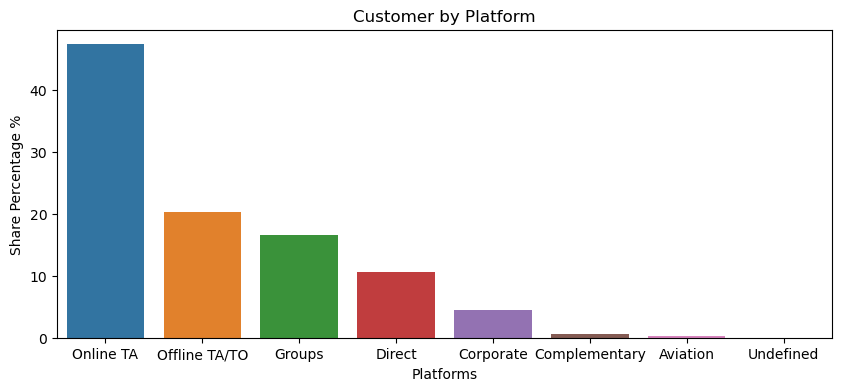

In [565]:
plt.figure(figsize=(10,4))
sns.barplot(y=platform, x=platform.index)

plt.title("Customer by Platform")
plt.xlabel("Platforms")
plt.ylabel("Percentage %")
plt.show()

Platform  Understanding
    
-  Online TA = Online Travel Agencies (Make My Trip, Goibibo, Cleartrip, Booking.com etc)
-  Offline TA = Offline Travel Agency/ Sometime Individual hired by hotel to convince people to book room 
-  Groups= Tour Groups, Wedding, Events etc
-  Corporate= Business Conference and Professional Meetings
-  Direct= Customer direct vist to hotel 
-  Complementry=  In this guest are not charged for Stay. Reason: Offer, Loyality Program Reward, Arrangement by Hotel
-  Aviation= Booking made by airline crew member between fights.

### Cancellation %  by Channel type

In [630]:
cancelled_perc= cancelled_data['market_segment'].value_counts(normalize=True)*100

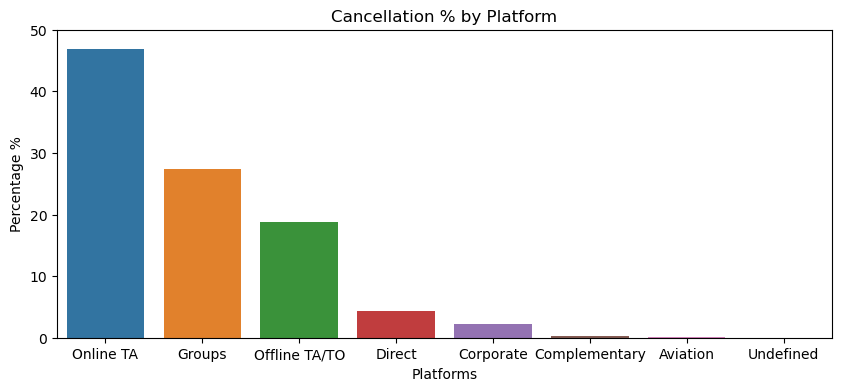

In [628]:
plt.figure(figsize=(10,4))
sns.barplot(y=cancelled_perc, x=cancelled_perc.index)

plt.title("Cancellation % by Platform")
plt.xlabel("Platforms")
plt.ylabel("Percentage %")
plt.ylim(0,50)
plt.show()

Note: 
-  Most Booking coming from: ONLINE TA
-  Mosy Cancellation coming from: ONLINE TA

What could be the reason:
-  Facilities and Room description  are not as promised on 'Online platforms'
-  Customer booked the hotel room online as backup and cancel as soon as get better option.
-  Cancelled due to drop in customer' plan

In [581]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month', 'year', 'day',
       'week'],
      dtype='object')

## ADR by Cancelled and not cancelled booking

In [594]:
#Filtering Cancelled and Not Cancelled data
cancelled_data= df[df['is_canceled']==1]
not_cancelled_data= df[df['is_canceled']==0]

In [595]:
# Grouping based on date
cancelled_grp_adr= cancelled_data.groupby('reservation_status_date', as_index=False)[['adr']].mean()
not_cancelled_adr= not_cancelled_data.groupby('reservation_status_date', as_index=False)[['adr']].mean()

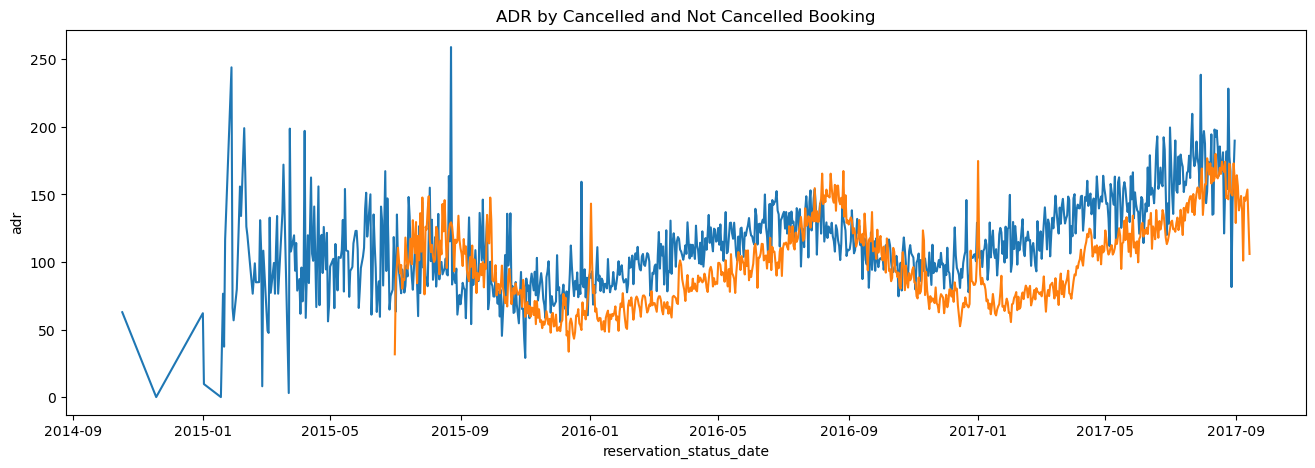

In [608]:
#Plotting
plt.figure(figsize=(16,5))

sns.lineplot(x='reservation_status_date', y='adr', data=cancelled_grp_adr)
sns.lineplot(x='reservation_status_date', y='adr', data=not_cancelled_adr)

plt.title("ADR by Cancelled and Not Cancelled Booking")
plt.show()

###  Above data is messy, So Filter date from 2016 to 2017 to get accurate view

In [625]:
#FILTERING
cancelled_filtered= cancelled_grp_adr[(cancelled_grp_adr['reservation_status_date']>'2016') & 
                                 (cancelled_grp_adr['reservation_status_date']<'2017-09')]

not_cancelled_filtered= not_cancelled_adr[(not_cancelled_adr['reservation_status_date']>'2016') & 
                                 (not_cancelled_adr['reservation_status_date']<'2017-09')]


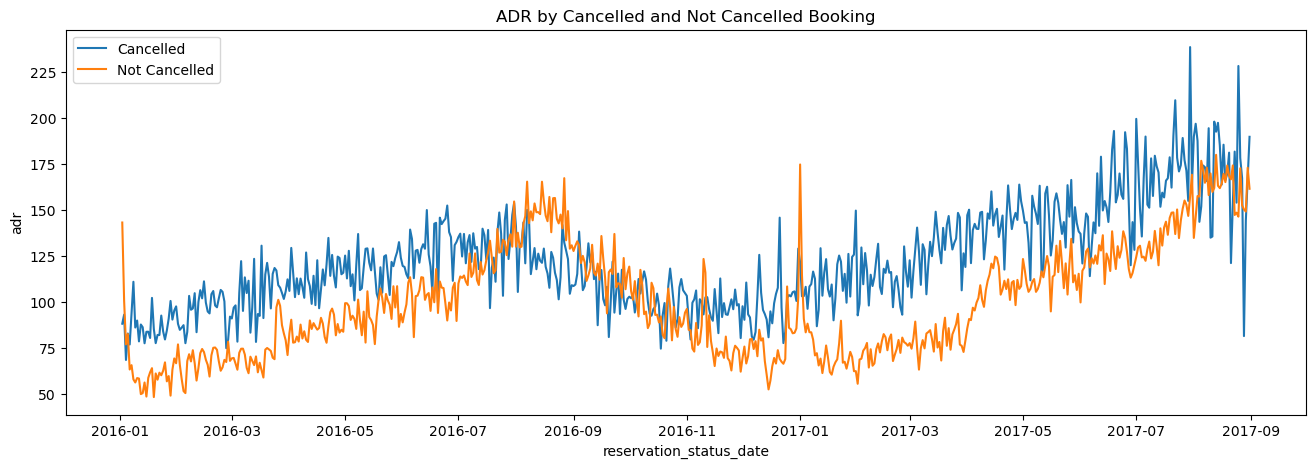

In [626]:
#Plotting
plt.figure(figsize=(16,5))

sns.lineplot(x='reservation_status_date', y='adr',label='Cancelled', data=cancelled_filtered)
sns.lineplot(x='reservation_status_date', y='adr',label='Not Cancelled', data=not_cancelled_filtered)

plt.title("ADR by Cancelled and Not Cancelled Booking")
plt.show()

Note:
-  Blue line representing Cancelled Booking, Orange line representing Not Cancelled Booking, This chart proves that most of the cancellation is happen due to higher price

# INSIGHTS

-  As per or analysis it is proved that Cancellation is increasing as the price are increasing. In Order to prevent cancellation 
   stakeholders could work on their pricing statategies.
   
-  Cancellation rate is 27% in Resort hotel which is 13% less than City hotel but then also its high. Resort hotel should do        more marketing with discounts.
    - One Primary reason for cancellation in Resoet hotel can be higher price, Offering discount could increase booking and           reduce cancellation further.
   
-  The Cancellation rate in City hotel is very high more than 40% . The main reson for cancellation in City Hotels are Online      travel Agents (MMT, Goibibo) etc.  
    - City hotels should make sure they should write facilities and post photos which they are actually offering. Because             Customer tends to cancel the booking when it does not meet his expectation.
    
    -  Sometime Customer may books a hotel and cancel because he found better option, Try to give them offers/discounts
    
    -  Provide facilities as promised, because if customer give bad review on Online Platform it would drastically decrease your        booking count.
    
- In December and January Booking is very less and Cancellation is approx. 50%.  Hotel should reduce the prices in this two       months and should do marketing and promotion to increase Bookings.

- Portugal is the country whose cancellation rate is more than 75%. They should revise the pricing and provide more facilities     services to avoid cancellation.